# Background:
"Cardio Good Fitness" is a home and commercial fitness equipment store, that specializes in their cardio equipments offerings. They have collected some customer data of their treadmill product(s) sold on their store, in order to understand and gain insights out of the data which will be beneficial for their business.

# Objective:
To explore and visualize the customer data on different treadmill products, gather insightful and/or actionable information on customer characteristics with respect to their products which will help them targeting new customers.

# Key Questions to be answered:
1. Can we create customer profile for the product(s) in the dataset?  
2. Can we gather key insights on customer characteristics and draw recommendation to target new customers? 

# Provided Dataset contains:

1. Product - the model no. of the treadmill
2. Age - in no of years, of the customer
3. Gender - of the customer
4. Education - in no. of years, of the customer
5. Marital Status - of the customer
6. Usage - Avg. # times the customer wants to use the treadmill every week
7. Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
8. Income - of the customer
9. Miles- expected to run

## Import necessary Python Libraries which will be required for this data analysis

In [157]:
import pandas as pd #pandas library will be used to hold and explored the data in structured way
import numpy as np #numpy library will be required for any numerical operations 
#Below libraries matplotlib and seaborn will be used for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
#Below are some important imports which will help
%matplotlib inline 
#Below will add colors on the background of seaborn plots
#sns.set(color_codes = True)
pd.set_option('expand_frame_repr', False) #To avoid data formatted in multiple lines for pandas dataframes
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset provided into pandas dataframe

In [158]:
cgfdata_backup = pd.read_csv('CardioGoodFitness.csv')

## Create a working copy of the dataset to avoid changes in original dataset

In [159]:
#Copying the dataset to another dataframe as working copy for further analysis
cgfdata = cgfdata_backup.copy()

## Display first 10 and last 10 rows to check if all the data imported correctly

In [160]:
print(cgfdata.head(10)) #Print first 10 rows of dataset
print(' ')
print(cgfdata.tail(10)) #Print last 10 rows of dataset

  Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47
5   TM195   20  Female         14     Partnered      3        3   32973     66
6   TM195   21  Female         14     Partnered      3        3   35247     75
7   TM195   21    Male         13        Single      3        3   32973     85
8   TM195   21    Male         15        Single      5        4   35247    141
9   TM195   21  Female         15     Partnered      2        3   37521     85
 
    Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
170   TM798   31    Male         16     Partnere

#### Observation:
- Dataset looks clean and consistent with the description provided in the data dictionary.
- Age, Education, Usage, Fitness, Income, Miles all are numerical variables
- Product, Gender, MaritialStatus are categorical variables
- Product contains the model no of treadmill for which the customer information are recorded in other columns.

## Check the shape of the dataset

In [161]:
cgfdata.shape #shape function will give the number of rows and columns of the dataset

(180, 9)

#### Observation:
- Dataset has 180 observations with 9 data points for each rows.

## Check the information of all columns of the dataset

In [162]:
cgfdata.info() #gives details of each columns including data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


#### Observations:
- All columns have 180 observations, which is inline with the shape of the data.
- Product, Gender, MaritialStatus are stored as object data type, which can be defined as categorical data.

## Check for missing values in the dataset

In [163]:
cgfdata.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

#### Observations:
- Confirms there are no missing values.
- No missing value treatment would be required.

# Data Preprocessing

## Changing the data types

In [164]:
#astype() function is used to change the data type to 'category' for Product, Gender, MaritalStatus columns
cgfdata['Product'] = cgfdata['Product'].astype('category')
cgfdata['Gender'] = cgfdata['Gender'].astype('category')
cgfdata['MaritalStatus'] = cgfdata['MaritalStatus'].astype('category')

## Confirm the change of data types

In [165]:
cgfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.4 KB


#### Observations:
- Datatypes for the Product, Gender and MaritalStatus columns are chnaged.
- Now there are 3 categorical and 6 numerical columns.
- All numerical columns are still of integer data type.

## Check the summary of the data

In [166]:
cgfdata.describe().T #Describe gives 5 points summarry along with other information .T is used for rowwise readability

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


#### Observations:
- Age has minimum value as 18 which tells us data are only recorded for adults.
- There is a big difference between third quartile and max value in Income column, there might be outliers to the right.
- There are noticable differences between first quartile and min value, max and third quartile for Miles columns, it would be interesting to see the dispersion of this column

## Now let's check the summary of Categorical columns, since by default they are not shown in describe()

In [167]:
cgfdata.describe(exclude = 'number').T #exclude parameter is used to filter the numerical columns

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


#### Observations:
- Product has 3 unique values, which means data are recorded for 3 different treadmill models
- Gender has two unique values, and the frequency of it tells us products are used more by Male customers
- MaritialStatus has two unique values, and the frequency of it tells us products are used more by Partnered individuals

## Get the counts of each unique value in Category columns

In [168]:
#list of all category columns
catcol = ['Product', 'Gender', 'MaritalStatus']

#looping through all column names in list to get the counts of each unique values 
for col in catcol:
    print('Below are the counts of each unique value in Category column :',col)
    print(cgfdata[col].value_counts())

Below are the counts of each unique value in Category column : Product
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64
Below are the counts of each unique value in Category column : Gender
Male      104
Female     76
Name: Gender, dtype: int64
Below are the counts of each unique value in Category column : MaritalStatus
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


#### Observations:
- TM195 Model seems to be used by more customers than their other two models
- Unique value counts of columns Gender and MaritalStatus tells us products are used by more males compared to female, and Partnered individuals compared to Singles.

# Exploratory Data Analysis

## 1. Univariate Analysis

### Check the dispersion and distribution of each numerical columns

#### First we will define a function to plot boxplot and histogram when we call the function for any given attributes. This will help us study their central tendencies and the dispersion

In [169]:
#Below is a function which will take input as numerical attributes, 
#titlevar to be able to dynamically populate the title for each plot
#figure size (to have the flexibility to have custom figsize if necessary), bins(for histogram) and 
#returns boxplot and histogram plot for the numerical attribute passed.
def box_hist(feature, titlevar, figsize=(15,10), bins = None):
    fig,(axb,axh) = plt.subplots(nrows=2, #Number of rows to be plotted for subplot
                                 sharex = True, #x-axis will be shared for all subplots
                                 gridspec_kw = {"height_ratios": (.25, .75)}, #pass on the grid spaces to Gridspace constructor for subplots
                                 figsize = figsize
                                )
    sns.boxplot(feature,ax = axb,showmeans=True,color='cyan') #plots the boxplot with color as cyan and show a marker for mean value
    axb.set_title('BoxPlot for: {}'.format(titlevar),fontweight = 'bold',fontsize = 18) 
    sns.distplot(feature,ax = axh,kde=False,bins = bins,color='lightgreen') if bins else sns.distplot(feature,ax = axh,kde=False,color='lightgreen') #plots histogram
    axh.axvline(np.mean(feature),linestyle = '-', color = 'red') #Add a red vertical line for mean value of the feature
    axh.axvline(np.median(feature),linestyle = '--', color = 'black') # Add a green vertical line for median value of the feature
    plt.ylabel('Count')
    axh.set_title('Distribution Plot for: {}'.format(titlevar),fontweight = 'bold',fontsize = 18) 


### Check the numerical column  - Age

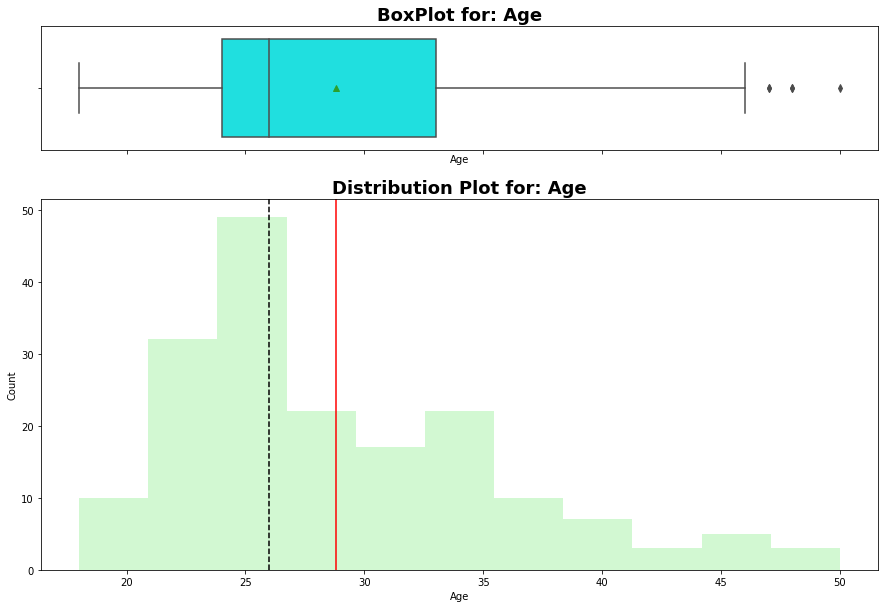

In [170]:
box_hist(cgfdata['Age'],'Age') #Call box_hist function defined above to plot box plot and histogram for the attribute

#### Observations:
- Data present in Age column are right skewed. 
- Age has range of values from 18 to 50
- Majority of the data present in Age column are below age of ~35
- Dataset has data for Customers with age as high as 50

## Check the numerical column - Education

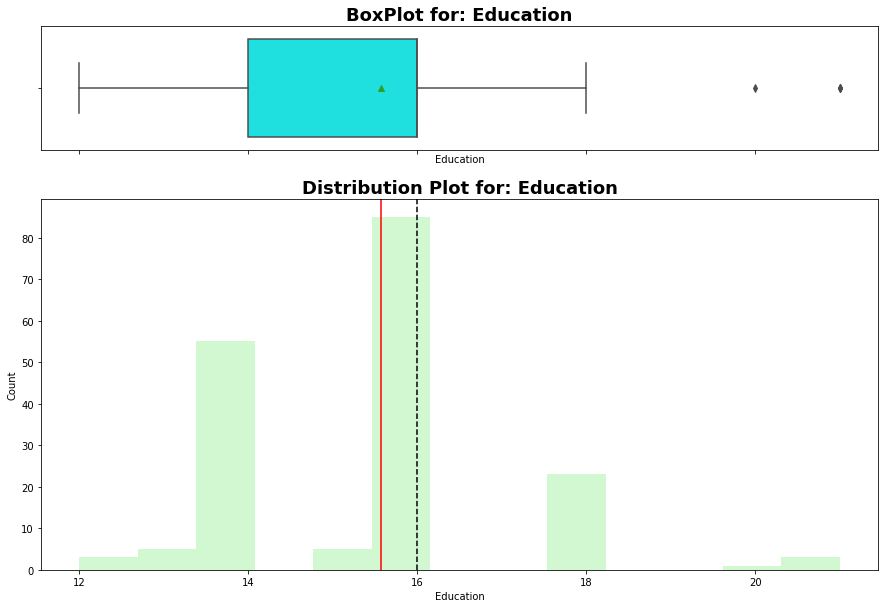

In [171]:
box_hist(cgfdata['Education'],'Education')

#### Observations:
- Mean (red line) and Median (black dotted line) are very close to each other but mean is still less than median
- Data is right skewed even though mean is less, this could occur for variables discrete in nature.
- Data in Education columns varies in Range from 12 to 21
- Majority of the customers have education 16 years or below

## Check the numerical column - Usage

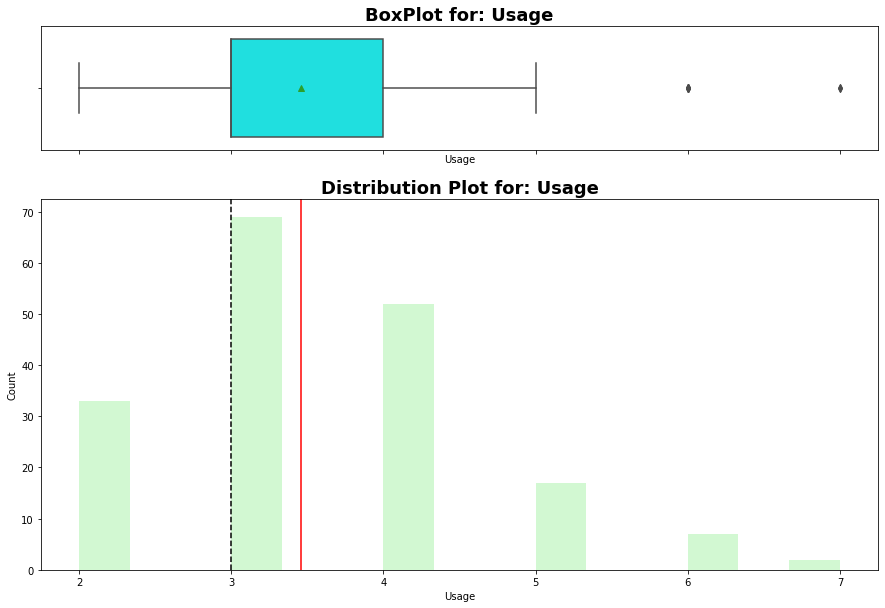

In [172]:
box_hist(cgfdata['Usage'],'Usage')

#### Observations:
- Mean is greater than the median, which tells us data is right skewed.
- We can observe few outliers to the right, those are customers who intend to use the priduct 6/7 times a week.
- It will be interesting to see how this affects their product of choice.

## Check the numerical column - Fitness

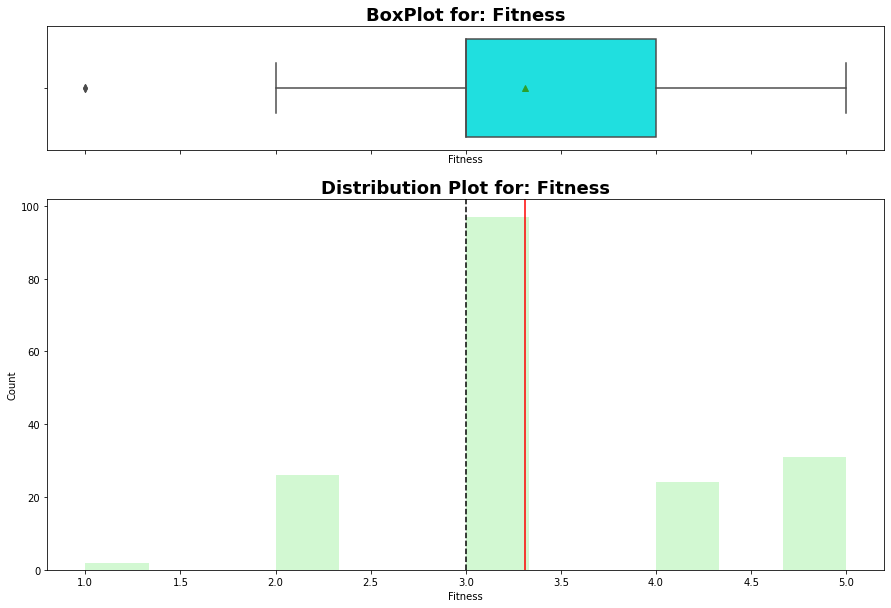

In [173]:
box_hist(cgfdata['Fitness'],'Fitness')

#### Observations:
- Data looks fairly symmetrical, as mean and median are very close
- ~100 customers intend to use the product atleast 3 times a week

## Check the numerical column - Income

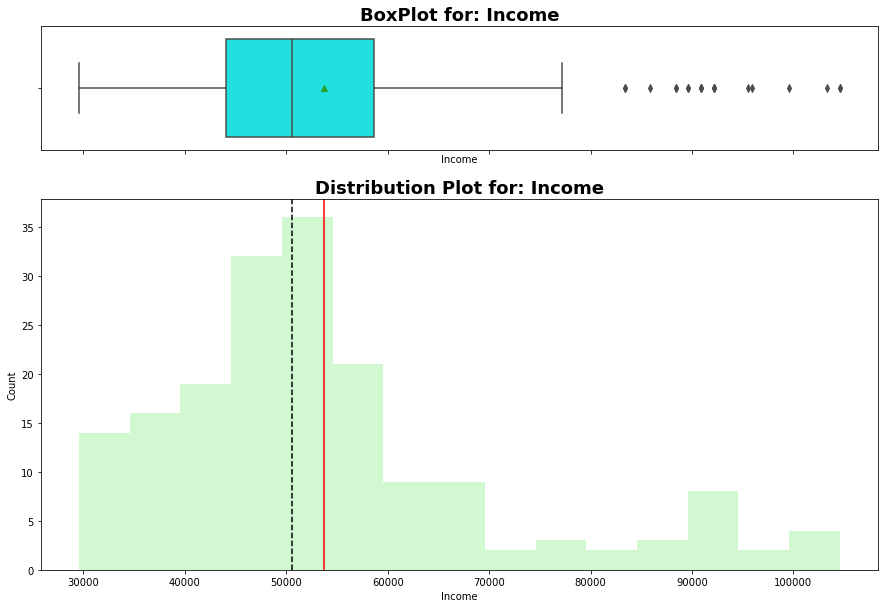

In [174]:
box_hist(cgfdata['Income'],'Income')

#### Observations:
- Many outliers could be observed towards the right.
- Data is highly right skewed.
- Data in Income columns widely ranged, however has value as high as ~104000 
- Have to explore more how this affect the choice of product.

## Check the numerical column - Miles

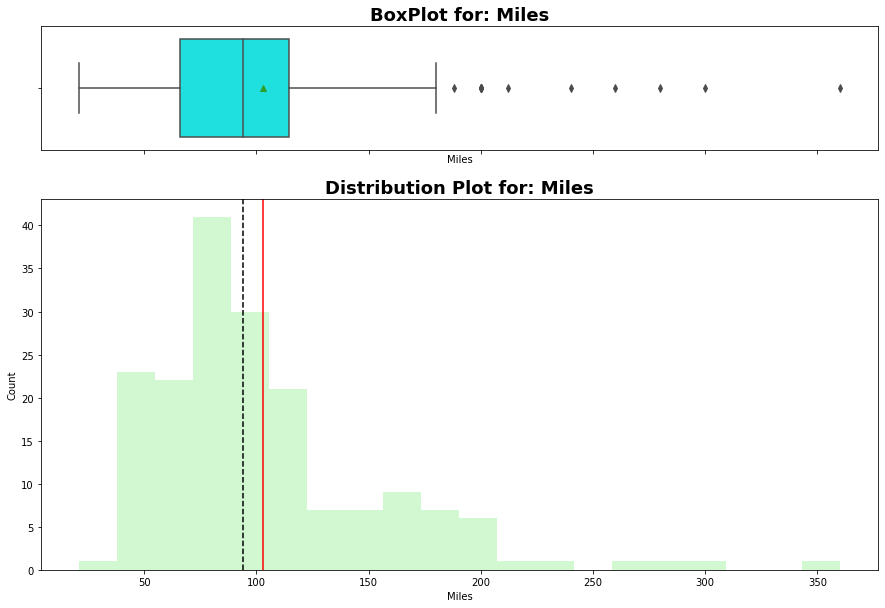

In [175]:
box_hist(cgfdata['Miles'],'Miles')

#### Observations:
- We can observe many outliers towards right.
- Data is highly right skewed and with wide spread range.
- Data suggest there are few customers who intend to use the products heavily.
- It will be interesting to see if their expected miles to run has any significant affect on their choice of product.

## Visualize categorical columns 

#### Defining a function which will show percentage values for each category in Categorical columns

In [176]:
#This function will take the plot and feature as input and calculate percentages for each category, followed by
#annotating them in the plot
def perc_annot(plot,feature):
    tot = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/tot) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.10 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

### Check the categorical columns - Product, Gender, MaritalStatus

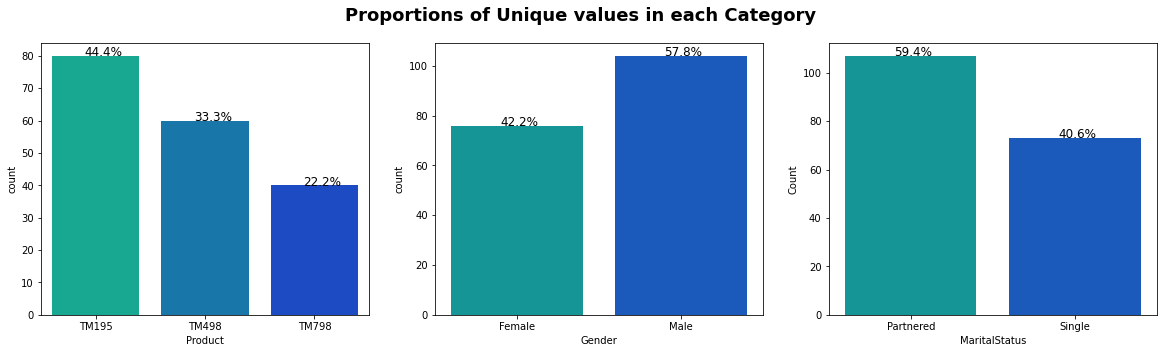

In [177]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(20,5)) #Create 3 column wise subplots
ax = sns.countplot(cgfdata['Product'],palette='winter_r',ax=ax1) #plotting first subplot
plt.ylabel('Count')
perc_annot(ax1,cgfdata['Gender']) #perc_annot() function is used to show the percentages annotation
ax = sns.countplot(cgfdata['Gender'],palette='winter_r',ax=ax2) #plotting second subplot
plt.ylabel('Count')
perc_annot(ax2,cgfdata['Gender'])
ax = sns.countplot(cgfdata['MaritalStatus'],palette='winter_r',ax=ax3) #plotting third subplot
plt.ylabel('Count')
perc_annot(ax2,cgfdata['MaritalStatus'])
plt.suptitle('Proportions of Unique values in each Category',fontsize = 18, fontweight = 'bold')
plt.show()

#### Observations:
- We can observe the proportions of 3 treadmill models in Products - TM195, TM498, TM798 are 44.4%, 33.3%, 22.2% respectively
- There are 57.8% of Male customers and 42.2% of Female customers
- There are 59.4% of customers who are Partnered, and 40.6% are Single.

## 2. Bivariate Analysis

### Check variables relationship among each other by plotting bivariate charts

#### Plotting heatmap to understand the corrleation among each other for the numerical columns

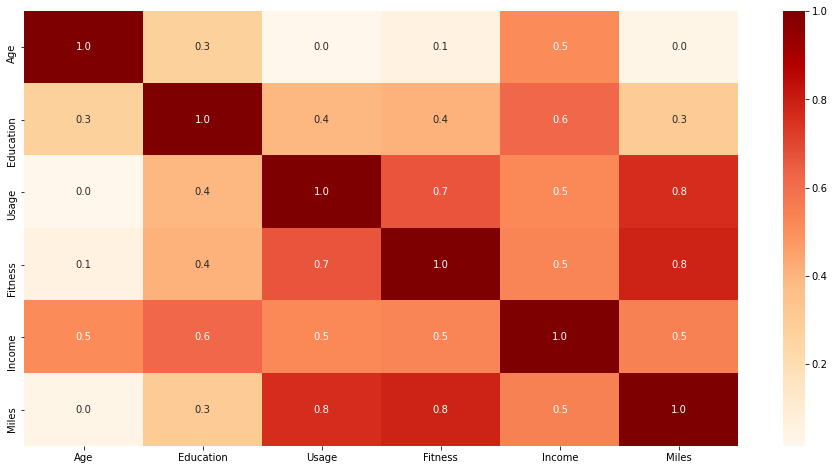

In [178]:
# plot the heatmap
plt.figure(figsize=(16,8))
sns.heatmap(cgfdata.corr(), annot=True, cmap='OrRd', fmt=".1f",
        xticklabels=cgfdata.corr().columns,
        yticklabels=cgfdata.corr().columns)
plt.show()

#### Observations:
- We can observe Fitness and Usage each of them has very high correlation with expected miles to run as expected.
- Fitness and Usage are also highly correlated among each other.
- Education and Income also shows high correlation, which make sense.
- There is no negative correlation which we can observe.
- Decent postive correlation between Income and Age make sense. But other than that Income also shows decent positive correlation with Usage, Fitness and Miles, which would be interesting to see in bivariate scatterplot.

### Check bivariate scatterplot to see if we can observe any other correlation

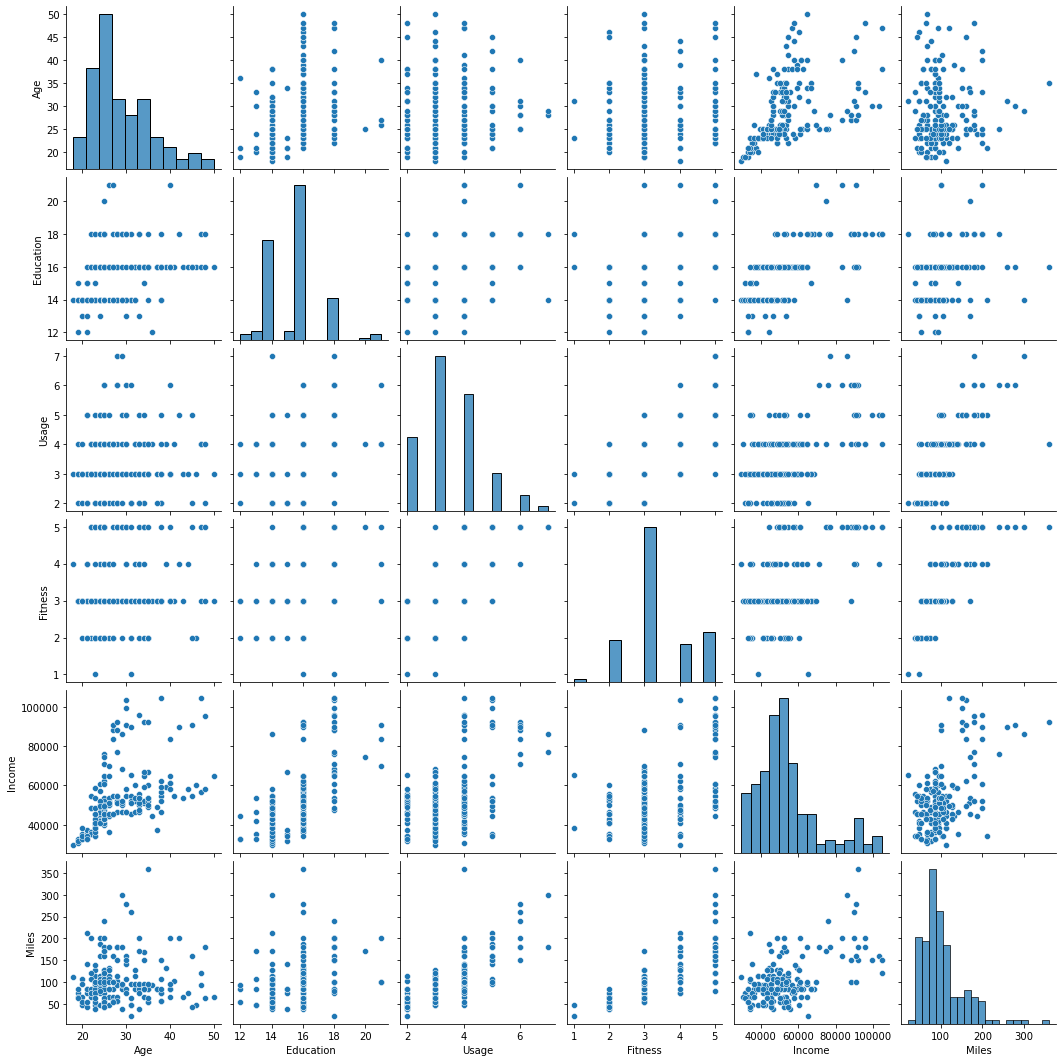

In [179]:
sns.pairplot(cgfdata) #pairplot plots scatter plot for each combination of numerical columns
plt.show()

#### Observations:
- Nothing additionally we can observe from these scatter plots among each other for all numerical variables.
- Here also we can see Income has positive correlation with Age, Usage, Fitness and Miles.

### Check if we can observe any pattern among Gender and MaritalStatus with Product

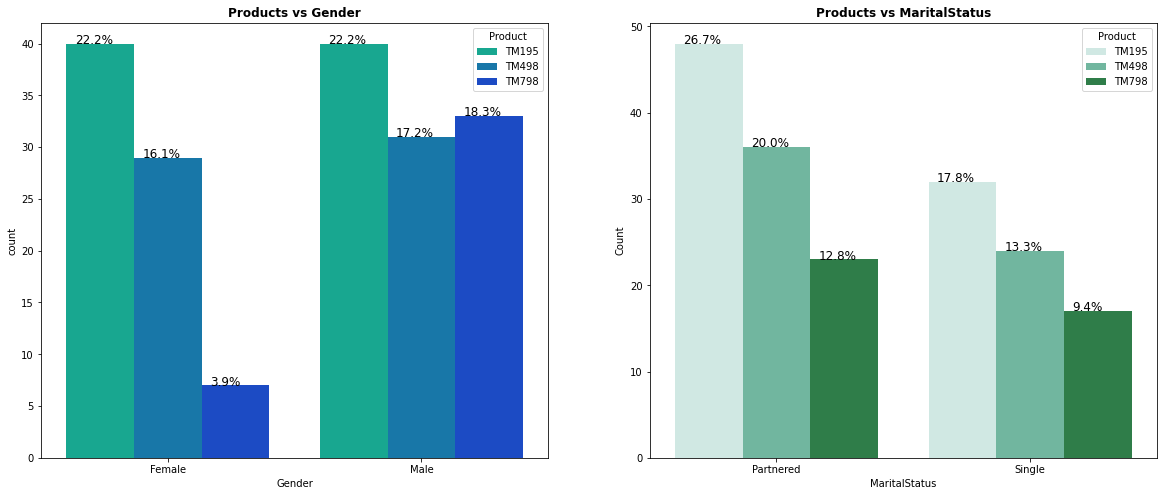

In [180]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))
ax = sns.countplot(cgfdata['Gender'],palette='winter_r',ax=ax1,hue=cgfdata['Product'])
ax1.set_title('Products vs Gender',fontweight = 'bold')
plt.ylabel('Count')
perc_annot(ax1,cgfdata['Product'])
ax = sns.countplot(cgfdata['MaritalStatus'],palette='BuGn',ax=ax2,hue=cgfdata['Product'])
ax2.set_title('Products vs MaritalStatus',fontweight = 'bold')
plt.ylabel('Count')
perc_annot(ax2,cgfdata['Product'])

#### Observations:
- We can observe TM798 product is used more by Male customers than Female.
- TM195 and TM498 product are used by almost equal number of Male and Female customers, there's no significant difference.
- All of the products seems to be used more by customers who are Patnered than Single. 

## 3. Multivariate Analysis

### First let's check the proportion of Partnered and Single customers for each combination of Product and Gender

#### Grouping the data to find the count for the combination we want to explore

In [181]:
#groupby function will group the required columns and then count() function will be used to get the 
#counts for each combination. Lastly unstack() function will put the groupby data in a pivot table and returns
#a Dataframe
cgfdata_grouped = cgfdata.groupby(['Product', 'Gender', 'MaritalStatus'])['Fitness'].count().unstack()
cgfdata_grouped

MaritalStatus   Partnered  Single
Product Gender                   
TM195   Female         27      13
        Male           21      19
TM498   Female         15      14
        Male           21      10
TM798   Female          4       3
        Male           19      14

#### Observations:
- We can observe the MaritalStatus wise breakup for each Product and Gender group.
- Even though few combinations have almost equal proportion of Partnered and Single customers still we can see Partnered customers are using the products more than Singles.

#### Visually represent the proportion using stacked bar chart

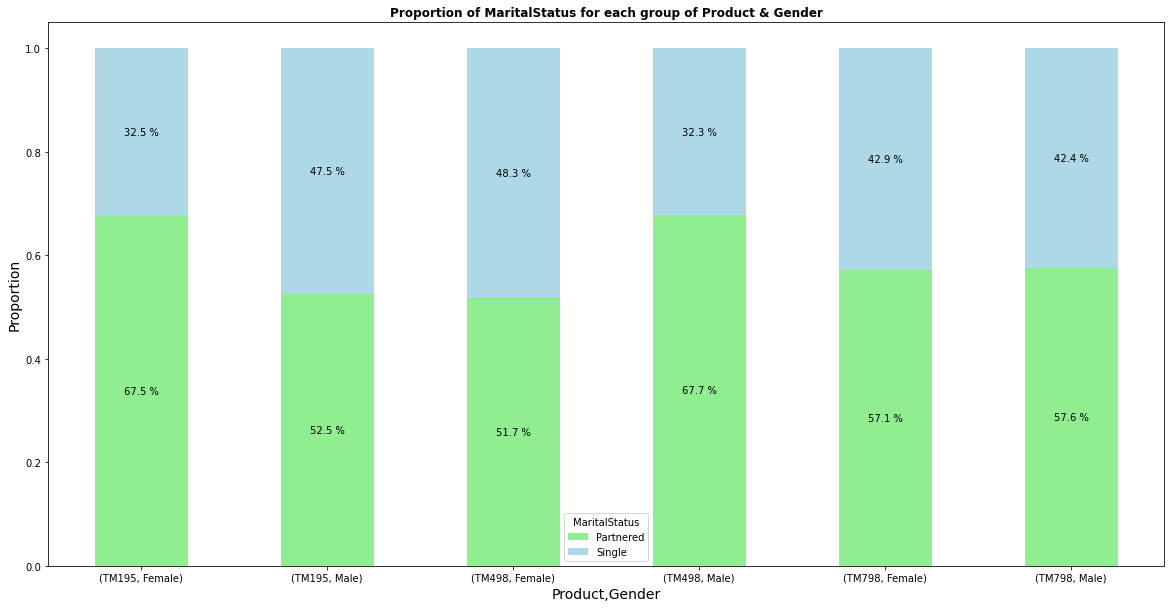

In [182]:
#To represent the data in plot in a uniform way, converting the counts to proportions
cgfdata_grouped_pc = cgfdata_grouped.T.div(cgfdata_grouped.T.sum()).T
#Plot the data in a stacked bar chart
ax=cgfdata_grouped_pc.plot(kind='bar',stacked=True,figsize=(20,10),rot=0,color = ['Lightgreen','lightblue'])
plt.ylabel('Proportion',fontsize = 14)
plt.xlabel('Product,Gender',fontsize = 14)
plt.title('Proportion of MaritalStatus for each group of Product & Gender',fontsize=12,fontweight='bold')
#Below loop will annotate the bar patches with it's respective percentages
for p in ax.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2          
    ax.text(x, 
            y, 
            '{:.1f} %'.format(height * 100), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.show()

#### Observations:
- This stacked bar chart shows the percentages of Partnered and Single customers for each Product and Gender combination
- We can observe Products are being used more by customers who are Partnered.
- ~68% Female customers are Partnered of TM195 product.
- ~68% Male customers are Partnered of TM498 product.

### Now let's check the Product wise trend between the Customer attributes which showed high correlation 

### Check Fitness vs Miles across Products

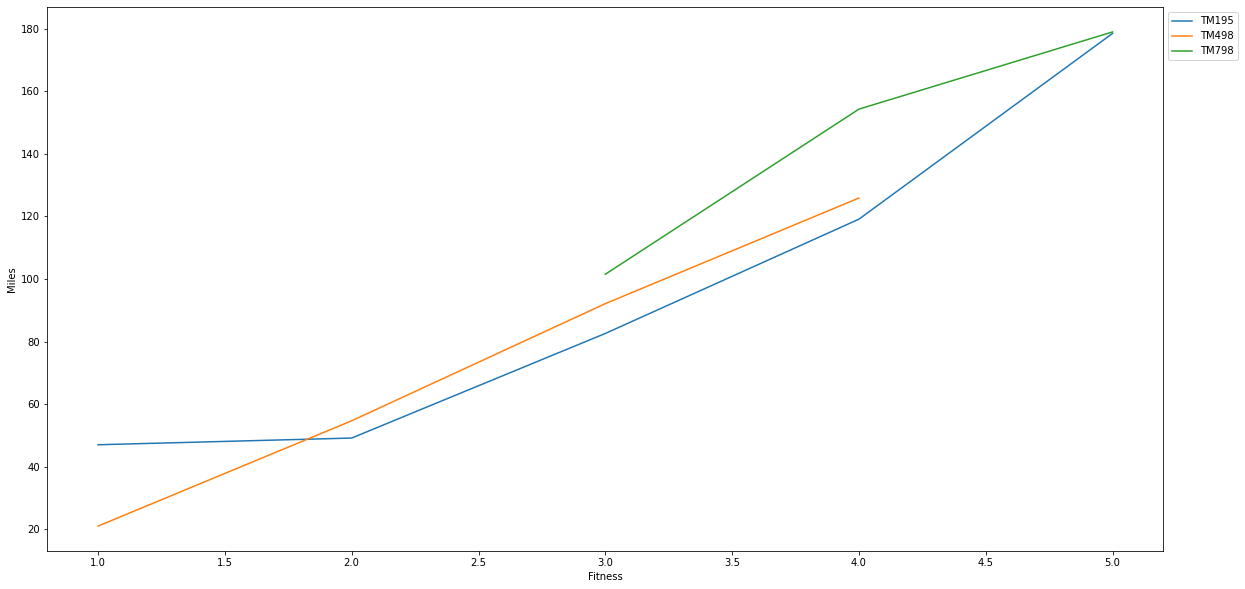

In [183]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Fitness',y='Miles',data=cgfdata,hue = 'Product',ci=None)
plt.legend(bbox_to_anchor=(1, 1)) #Add the legend outside of graph box
plt.show()

#### Observations:
- Customers who are Fit or moderately fit (3 and above) and intend to run atleast 100 miles per month are using TM798 product.
- We can't notice any significant differences for Products TM195 and TM498

### Check Usage vs Miles across Products

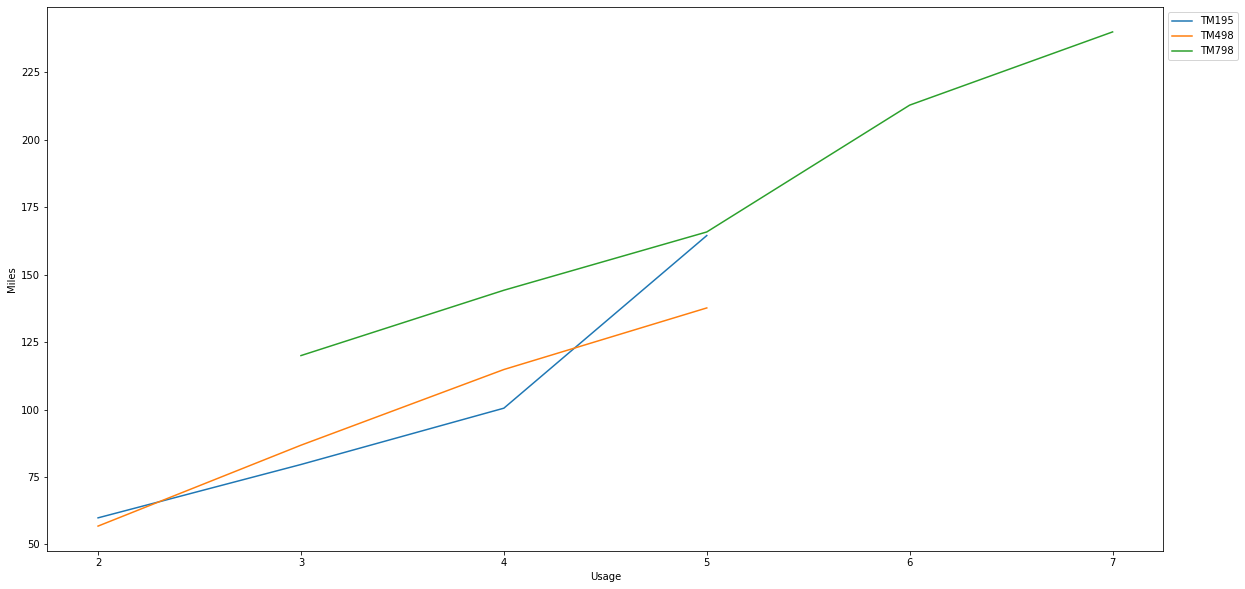

In [184]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Usage',y='Miles',data=cgfdata,hue = 'Product',ci=None)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observations:
- Again we can see there is no clear segregation for products TM195, TM498 with respect to Usage and Miles intend to run
- Customers who intend to run high miles (>100) every month, intend to use atleast 5 times a week are using TM798 product.

### Check Fitness vs Usage across Products

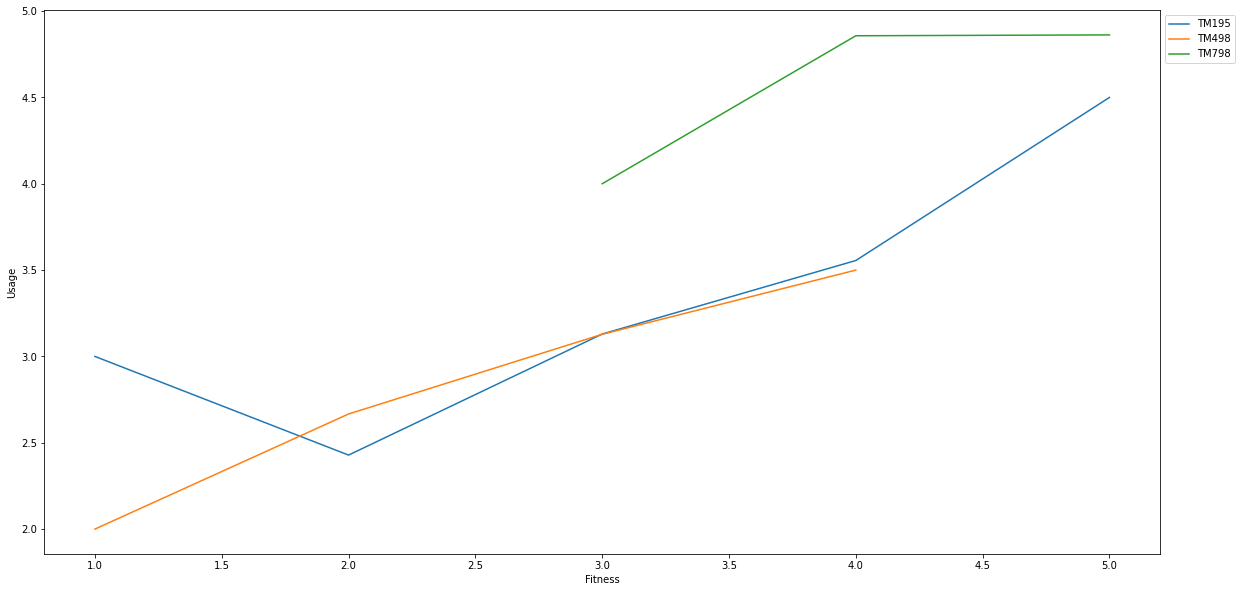

In [185]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Fitness',y='Usage',data=cgfdata,hue = 'Product',ci=None)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observations:
- No additional observations other than what we have already captured in the prior two relationships we have explored. 
- Fit(>3) customers who are intend to use the product more than average usage per week, and intend to run more than average intended run per month is using TM798 product

### Check Age vs Income across Products

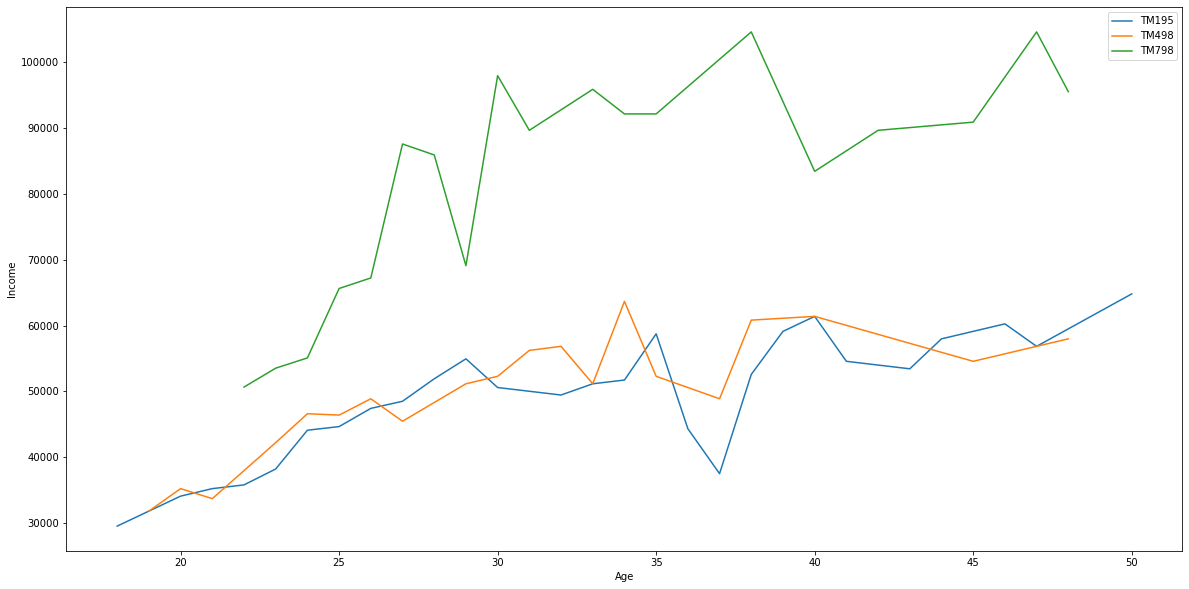

In [186]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Age',y='Income',data=cgfdata,hue = 'Product',ci=None)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observations:
- There is a clear segration for the product TM798 from other products, customers who has Income > 50000 are using this product.
- There is no clear segration among TM195, TM498 with respect to Customers Income or Age.

### Check Education vs Income

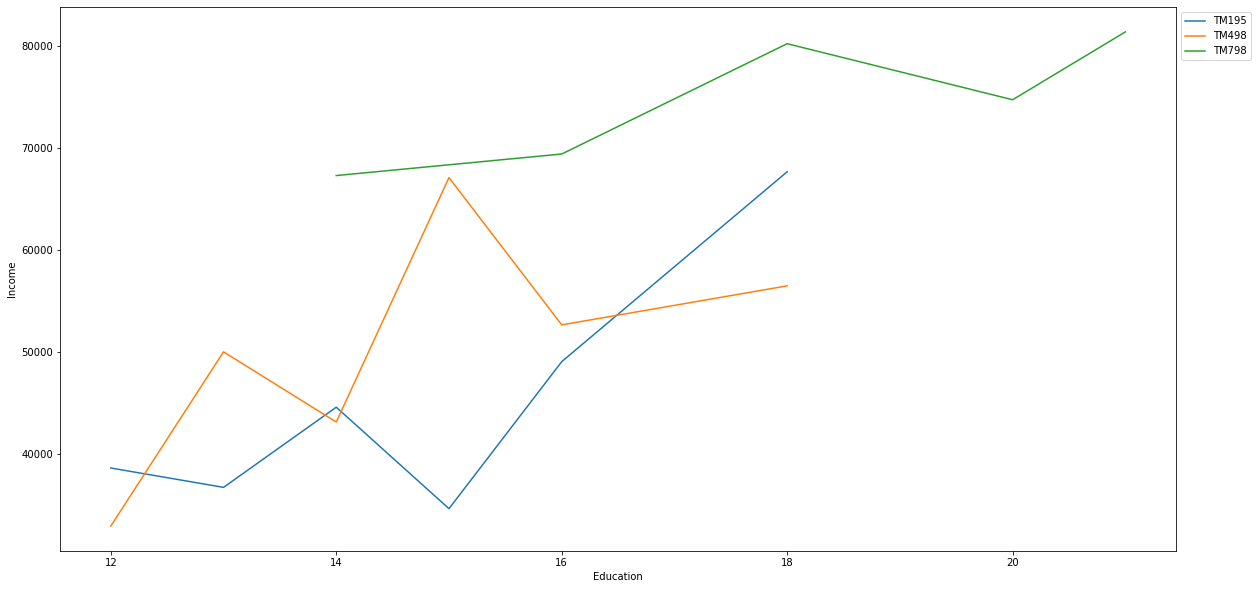

In [187]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Education',y='Income',data=cgfdata,hue = 'Product',ci=None)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observations:
- We have already observed that customers having higher Income are using TM798.
- We can see Customers with higher education (>18) are using TM798, however this could be because of outliers present.
- Let's observe after removing the outliers from Education column

#### Removing outliers from Eductaion and saving data in a new dataframe

In [188]:
iqr_ed = ((((cgfdata['Education'].quantile(.75)) - (cgfdata['Education'].quantile(.25))) * 1.5) +
                                 (cgfdata['Education'].quantile(.75)))
cgfdata_ed_out_rm = cgfdata[cgfdata['Education'] <= iqr_ed]

#### Check the shape of the new dataframe after removal of outliers

In [189]:
print(cgfdata_ed_out_rm.shape)

(176, 9)


#### Now let's again see if removing outlier gives us any different observations 

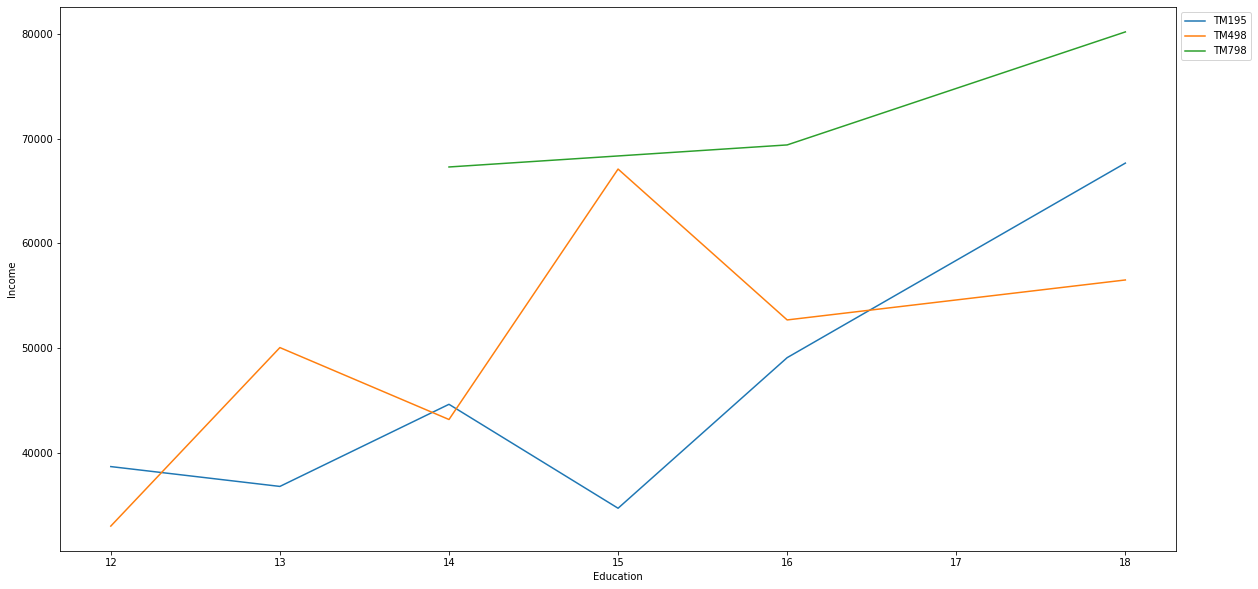

In [190]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Education',y='Income',data=cgfdata_ed_out_rm,hue = 'Product',ci=None)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### Observations:
- After removing outlier we can observe the Education doesn't have much impact across products.

### As we observed Income is one of the key feature in this dataset, let's check the dispersion of the data across products

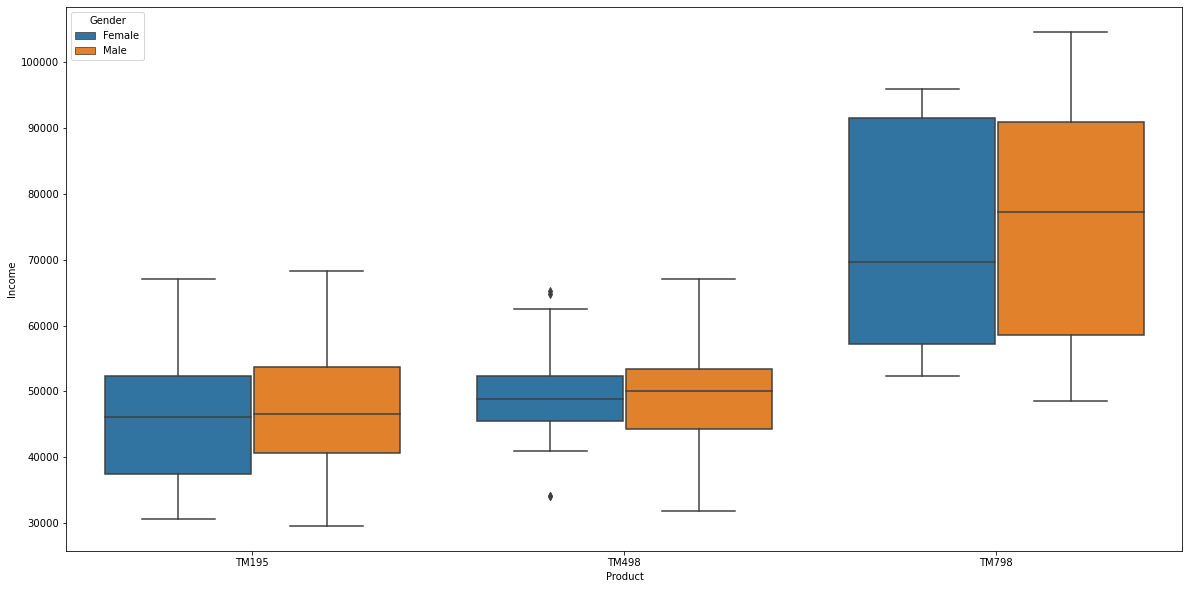

In [191]:
plt.figure(figsize=(20,10))
sns.boxplot(cgfdata['Product'],cgfdata['Income'],hue=cgfdata['Gender'])
plt.show()

#### Observations:
- As we have observed earlier that there is a clear segregation on Customer's income between TM798 and other two products. Here also we can observe the same.
- Let's check the dispersion and confirm the understanding.

### Dispersion using Violin catplot

<Figure size 1440x720 with 0 Axes>

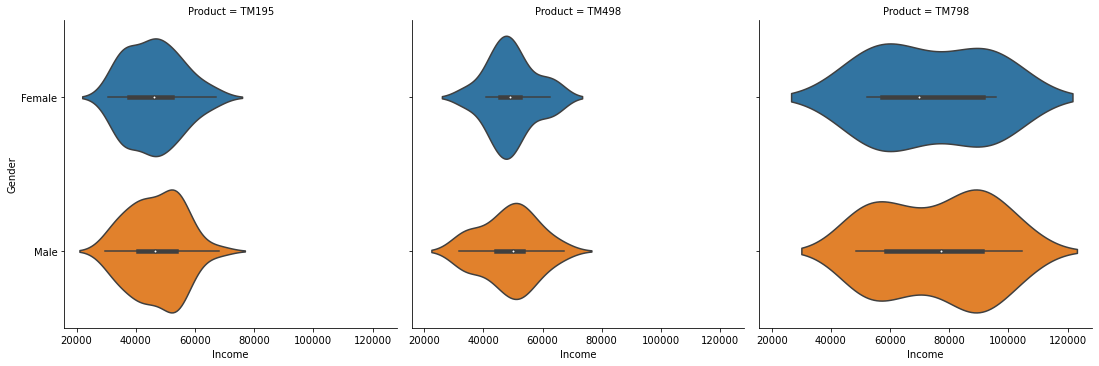

In [192]:
plt.figure(figsize=(20,10))
sns.catplot(x='Income',y='Gender',
             col='Product', 
             data=cgfdata,
             col_wrap=4,
             kind="violin")
plt.show()

#### Observations:
- This dispersion data of Income across Products also confirms the observation of Customers with higher income range ~ > 60000 is using TM798

# Conclusion and Recommendation

## Conclusion

We have analyzed dataset of 180 records of customer data captured for treadmill products sold by "Cardio Good Fitness" store. Our objective was to create customer profiles for their products and extract insightful/actionable information on customer attributes which will help targetting new customers. With this objective in mind our main focus was to identify how the different attributes of customers presented in the dataset affects their choice of the product.

1. More male customers than female.
2. Customers who are Partnered are using the products more than Singles.
3. Customers who has higher than average income ~60000, has fitness level 3 or higher, intend to run more than 100 miles is using TM798.
4. TM798 is predominantly used by Male customers.
5. There are no significant differences in customer profile of other two products TM195, TM498. 
6. Customers with income less than ~60000 are using one of these two products TM195, TM498.


## Recommendation to Business:

1. TM195 is the top selling product, product availability should be ensured. 
2. TM798 shows more potential with Male customers with higher income level, Marketing strategy should target that segment of customers as higher potentials.
3. Even though we haven't observed significant differences in customer characteristics for TM195, TM498 or much difference in total sales, however TM195 is more popular among Females who are married, and TM498 among Males who are married. It should be kept in mind during target marketing.
4. Procure more data with month/year wise sales along with price data, it will help narrow down customer segments for more precise target marketing.
5. Procure data on performance and endurance of different models, merging this data with customer sales will help further drill down on customer's choice as we have observed who intend to use more or run more miles are choosing TM798 over other models.
6. Procure data on Customer has Gym membership/Access to Gym or not could help us identify and observe further insights on why there are less Customers who are Singles

